In [8]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# print(X_numpy)
# print(y_numpy)
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
print(X.shape)

y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)

y = y.view(y.shape[0], 1)
# print(y)
n_samples, n_features = X.shape


torch.Size([100, 1])
torch.Size([100])


In [10]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
# print(model.bias)

Parameter containing:
tensor([0.4458], requires_grad=True)


In [14]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
# print(criterion)
# print(optimizer)

epoch: 10, loss = 290.1598
epoch: 20, loss = 290.1597
epoch: 30, loss = 290.1597
epoch: 40, loss = 290.1597
epoch: 50, loss = 290.1598
epoch: 60, loss = 290.1597
epoch: 70, loss = 290.1597
epoch: 80, loss = 290.1597
epoch: 90, loss = 290.1597
epoch: 100, loss = 290.1597


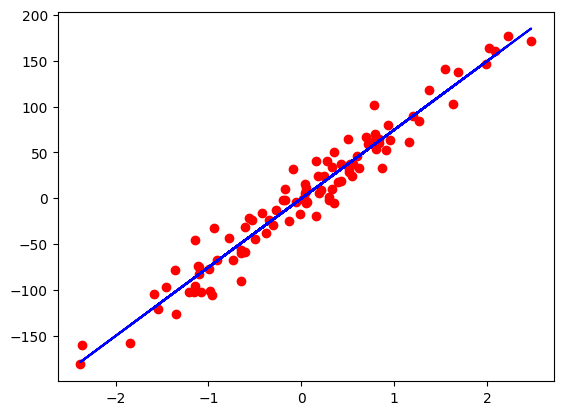

In [23]:

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
# print(X, y)
n_samples, n_features = X.shape
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape )

(569, 30)
(455, 30) (114, 30)
(455,) (114,)


In [30]:

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

print(X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape )

torch.Size([455, 30]) torch.Size([114, 30])
torch.Size([455, 1]) torch.Size([114, 1])


In [31]:

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)
print(model)

Model(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)
